# **Librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

# **Preprocesamiento**

In [ ]:
def reduction(data, components):
    pca = PCA(n_components=components)
    principalComponents = pca.fit_transform(data)
    df = pd.DataFrame(data=principalComponents)
    df.to_csv("reducted.csv", index=False)


def normalize(data):
    scaler = MinMaxScaler()
    normalizeData = scaler.fit_transform(data)

    return normalizeData


def preprocessing(dataset, outputfile, shuffle=False):
    df = pd.read_csv(dataset)
    df = df.dropna()
    df.iloc[:, 1:] = normalize(df.iloc[:, 1:])

    if shuffle == True:
        # np.random.seed(0)
        df = df.sample(frac=1)

    df.to_csv(outputfile, index=False)


def main():
    preprocessing("sign_mnist_train.csv", "train_normalize.csv", True)
    preprocessing("sign_mnist_test.csv", "test_normalize.csv")

main()

# **Leer CSV**

In [ ]:
train = pd.read_csv("train_normalize.csv")
test = pd.read_csv("test_normalize.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,0.670588,0.670588,0.674510,0.682353,0.690196,0.686275,0.686275,0.686275,0.690196,0.686275,0.686275,0.678431,0.678431,0.678431,0.670588,0.642857,0.633621,0.625551,0.610860,0.658824,0.658824,0.650980,0.650980,0.643137,0.643137,0.643137,0.635294,0.631373,0.674510,0.678431,0.686275,0.694118,0.694118,0.694118,0.694118,0.698039,0.694118,0.694118,0.690196,...,0.796078,0.792157,0.780392,0.780392,0.784314,0.768627,0.686275,0.588235,0.533333,0.458824,0.372549,0.282353,0.082353,0.109804,0.027451,0.058824,0.000000,0.074510,0.666667,0.615686,0.623529,0.619608,0.611765,0.607843,0.603922,0.600000,0.596078,0.588235,0.592157,0.584314,0.580392,0.584314,0.517647,0.356863,0.180392,0.074510,0.035294,0.003922,0.000000,0.000000
1,10,0.294118,0.368627,0.223529,0.062745,0.207843,0.262745,0.282353,0.305882,0.329412,0.384314,0.435294,0.462745,0.490196,0.505882,0.521569,0.504202,0.500000,0.502203,0.502262,0.580392,0.588235,0.592157,0.600000,0.607843,0.615686,0.619608,0.627451,0.631373,0.333333,0.368627,0.188235,0.074510,0.223529,0.266667,0.286275,0.309804,0.337255,0.392157,0.443137,...,0.282353,0.223529,0.247059,0.592157,0.674510,0.686275,0.694118,0.698039,0.705882,0.709804,0.717647,0.725490,0.082353,0.235294,0.290196,0.294118,0.313725,0.333333,0.364706,0.423529,0.458824,0.490196,0.694118,0.721569,0.662745,0.650980,0.537255,0.388235,0.286275,0.223529,0.258824,0.627451,0.678431,0.690196,0.698039,0.701961,0.709804,0.713725,0.725490,0.725490
2,4,0.400000,0.415686,0.439216,0.466667,0.486275,0.505882,0.521569,0.533333,0.549020,0.560784,0.576471,0.596078,0.607843,0.611765,0.619608,0.605042,0.594828,0.585903,0.583710,0.639216,0.643137,0.643137,0.647059,0.639216,0.635294,0.639216,0.635294,0.627451,0.415686,0.431373,0.450980,0.482353,0.505882,0.521569,0.537255,0.545098,0.560784,0.580392,0.596078,...,0.360784,0.384314,0.176471,0.231373,0.137255,0.000000,0.000000,0.000000,0.105882,0.019608,0.000000,0.000000,0.690196,0.721569,0.756863,0.788235,0.811765,0.819608,0.917647,0.501961,0.211765,0.807843,0.858824,0.819608,0.721569,0.607843,0.470588,0.364706,0.349020,0.345098,0.164706,0.066667,0.050980,0.019608,0.000000,0.000000,0.054902,0.078431,0.000000,0.000000
3,7,0.556863,0.560784,0.564706,0.576471,0.584314,0.592157,0.596078,0.603922,0.607843,0.611765,0.619608,0.615686,0.611765,0.611765,0.615686,0.584034,0.568966,0.563877,0.552036,0.603922,0.600000,0.600000,0.596078,0.592157,0.588235,0.588235,0.584314,0.580392,0.552941,0.564706,0.572549,0.580392,0.592157,0.600000,0.603922,0.611765,0.615686,0.615686,0.615686,...,0.752941,0.749020,0.745098,0.741176,0.741176,0.737255,0.729412,0.729412,0.733333,0.713725,0.639216,0.592157,0.000000,0.000000,0.000000,0.015686,0.607843,0.580392,0.584314,0.580392,0.584314,0.588235,0.592157,0.592157,0.580392,0.580392,0.584314,0.576471,0.568627,0.556863,0.556863,0.549020,0.549020,0.549020,0.549020,0.533333,0.458824,0.301961,0.125490,0.062745
4,20,0.607843,0.611765,0.611765,0.611765,0.615686,0.623529,0.619608,0.623529,0.623529,0.623529,0.623529,0.627451,0.631373,0.627451,0.623529,0.596639,0.586207,0.572687,0.570136,0.619608,0.611765,0.607843,0.603922,0.611765,0.490196,0.129412,0.019608,0.019608,0.615686,0.615686,0.619608,0.627451,0.631373,0.627451,0.631373,0.631373,0.631373,0.631373,0.639216,...,0.529412,0.549020,0.423529,0.313725,0.411765,0.670588,0.643137,0.694118,0.721569,0.709804

# **Separar features de target**

In [ ]:
train_labels = train.pop('label')
train_features = np.array(train.copy())

test_labels = test.pop('label')
test_features = np.array(test.copy())

# **Definir X y Y para test y train**

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
x_train = train_features
x_test = test_features

# **Verificar nan en X y Y**

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(np.any(np.isnan(x_train)))
print(np.all(np.isfinite(x_train)))
print(np.any(np.isnan(y_train)))
print(np.all(np.isfinite(y_train)))

(27455, 784)
(27455,)
False
True
False
True


## **Red neuronal MLP Classifier con:**


### **Función de activación relu**

### Se definen los modelos

In [ ]:
#Tres capas internas de 50 neuronas cada una
#optimizador de la estocástica basada en gradientes propuesto por Kingma, Diederik y Jimmy Ba 
clf = MLPClassifier(
    hidden_layer_sizes=(50, 50, 50),
    solver="adam",
    max_iter=100,
    #verbose=True
    )

#Tres capas internas de 50 neuronas cada una 
# Estocástica de gradiente descendiente
clf1 = MLPClassifier(
    hidden_layer_sizes=(50, 50, 50),
    solver="sgd",
    max_iter=100,
    #verbose=True
    )

#Tres capas internas de 20 neuronas cada una
#optimizador de la estocástica basada en gradientes propuesto por Kingma, Diederik y Jimmy Ba 
clf2 = MLPClassifier(
    hidden_layer_sizes=(20, 20, 20),
    solver="adam",
    max_iter=100,
    #verbose=True
    )

#Tres capas internas de 20 neuronas cada una 
# Estocástica de gradiente descendiente
clf3 = MLPClassifier(
    hidden_layer_sizes=(20, 20, 20),
    solver="sgd",
    max_iter=100,
    #verbose=True
    )

### Se entrenan los modelos

In [ ]:
clf.fit(x_train, y_train)
clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)
clf3.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=100, solver='sgd')

### Se generan las predicciónes con los datos de testing

In [ ]:
y_pred = clf.predict(x_test)
y_pred1 = clf1.predict(x_test)
y_pred2 = clf2.predict(x_test)
y_pred3 = clf3.predict(x_test)

### Se imprimen la matrices de confusión y los reportes de accuracy

In [ ]:
print("Matriz de confusión y reporte función relu variante 1 \n")
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))
print("\nMatriz de confusión y reporte función relu variante 2 \n")
print(confusion_matrix(y_test,y_pred1))
print()
print(classification_report(y_test,y_pred1))
print("\nMatriz de confusión y reporte función relu variante 3 \n")
print(confusion_matrix(y_test,y_pred2))
print()
print(classification_report(y_test,y_pred2))
print("\nMatriz de confusión y reporte función relu variante 4 \n")
print(confusion_matrix(y_test,y_pred3))
print()
print(classification_report(y_test,y_pred3))

Matriz de confusión y reporte función relu variante 1 

[[314   0   0   0   0   0   0   0   0   0   0   0  17   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 361   0   1   0   0   0   0  29  20   0   0   0   0   0   0   0   0
    0  21   0   0   0   0]
 [  0   0 282   0   0  21   0   0   0   0   0   0   0   7   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 159  19   0   0   0   0   0   5   0   0   0   0   0  24   0
    0  18   0   0  20   0]
 [  0  13   0   0 415   0   0   0  11   0   0   7   0   0   0   0   0  52
    0   0   0   0   0   0]
 [  0   0   0   0   0 226   0   0   0   0   0   0   0   0   0   0   0   0
   21   0   0   0   0   0]
 [  0   0   0   2   0   1 245  40   0   0  18   0   0   0   6  36   0   0
    0   0   0   0   0   0]
 [  0   0   0   0  15   0  44 332   0   0   0  18   0   0   6   0   0   0
    0  21   0   0   0   0]
 [ 20   0   0   0   0   0   0   3 204   0   0   0   0   0   0   0   0   0
    2   0   0  20   1  38]
 [  0   0   0   0   0  22   0   0  

### Se imprimen los accuracy de los modelos

---



In [ ]:
print('\n Accuracy función relu variante 1: {}%'.format(round(accuracy_score(y_test, y_pred), 2)*100))
print('\n Accuracy función relu variante 2: {}%'.format(round(accuracy_score(y_test, y_pred1), 2)*100))
print('\n Accuracy función relu variante 3: {}%'.format(round(accuracy_score(y_test, y_pred2), 2)*100))
print('\n Accuracy función relu variante 4: {}%'.format(round(accuracy_score(y_test, y_pred3), 2)*100))


 Accuracy función relu variante 1: 69.0%

 Accuracy función relu variante 2: 69.0%

 Accuracy función relu variante 3: 51.0%

 Accuracy función relu variante 4: 57.99999999999999%


### Se plotean las curvas de error 

Text(0, 0.5, 'ERROR')

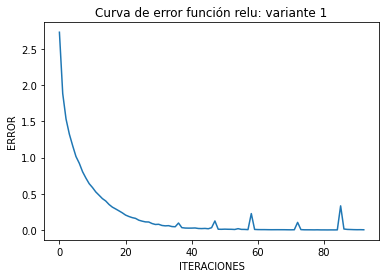

In [ ]:
plt.plot(clf.loss_curve_)
plt.title("Curva de error función relu: variante 1")
plt.xlabel("ITERACIONES")
plt.ylabel("ERROR")

Text(0, 0.5, 'ERROR')

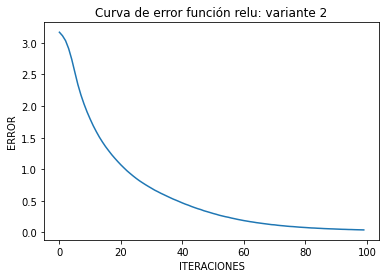

In [ ]:
plt.plot(clf1.loss_curve_)
plt.title("Curva de error función relu: variante 2")
plt.xlabel("ITERACIONES")
plt.ylabel("ERROR")

Text(0, 0.5, 'ERROR')

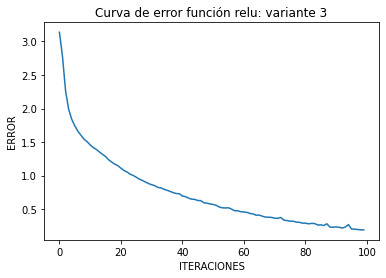

In [ ]:
plt.plot(clf2.loss_curve_)
plt.title("Curva de error función relu: variante 3")
plt.xlabel("ITERACIONES")
plt.ylabel("ERROR")

Text(0, 0.5, 'ERROR')

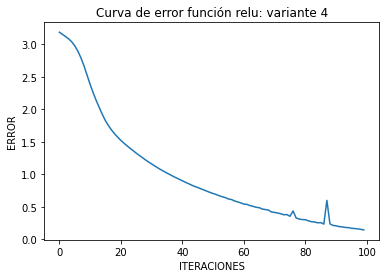

In [ ]:
plt.plot(clf3.loss_curve_)
plt.title("Curva de error función relu: variante 4")
plt.xlabel("ITERACIONES")
plt.ylabel("ERROR")

## **Función de activación tangencial hiperbólica**

### Se definen los modelos 

In [ ]:
#Tres capas internas de 50 neuronas cada una
#optimizador de la estocástica basada en gradientes propuesto por Kingma, Diederik y Jimmy Ba 
clf = MLPClassifier(
    hidden_layer_sizes=(50, 50, 50),
    solver="adam",
    max_iter=100,
    activation = 'tanh',
    #verbose=True
    )

#Tres capas internas de 50 neuronas cada una 
# Estocástica de gradiente descendiente
clf1 = MLPClassifier(
    hidden_layer_sizes=(50, 50, 50),
    solver="sgd",
    max_iter=100,
    activation = 'tanh',
    #verbose=True
    )

#Tres capas internas de 20 neuronas cada una
#optimizador de la estocástica basada en gradientes propuesto por Kingma, Diederik y Jimmy Ba 
clf2 = MLPClassifier(
    hidden_layer_sizes=(20, 20, 20),
    solver="adam",
    max_iter=100,
    activation = 'tanh',
    #verbose=True
    )

#Tres capas internas de 20 neuronas cada una 
# Estocástica de gradiente descendiente
clf3 = MLPClassifier(
    hidden_layer_sizes=(20, 20, 20),
    solver="sgd",
    max_iter=100,
    activation = 'tanh',
    #verbose=True
    )

### Se entrenan los modelos

In [ ]:
#Se entrena al modelo
clf.fit(x_train, y_train)
clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)
clf3.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='tanh', hidden_layer_sizes=(20, 20, 20), max_iter=100,
              solver='sgd')

### Se generan la predicciones con los datos de testing

In [ ]:
y_pred = clf.predict(x_test)
y_pred1 = clf1.predict(x_test)
y_pred2 = clf2.predict(x_test)
y_pred3 = clf3.predict(x_test)

### Se imprimen la matrices de confusión y los reportes de accuracy

In [ ]:
print("Matriz de confusión y reporte función tanh variante 1 \n")
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))
print("\nMatriz de confusión y reporte función tanh variante 2 \n")
print(confusion_matrix(y_test,y_pred1))
print()
print(classification_report(y_test,y_pred1))
print("\nMatriz de confusión y reporte función tanh variante 3 \n")
print(confusion_matrix(y_test,y_pred2))
print()
print(classification_report(y_test,y_pred2))
print("\nMatriz de confusión y reporte función tanh variante 4 \n")
print(confusion_matrix(y_test,y_pred3))
print()
print(classification_report(y_test,y_pred3))

Matriz de confusión y reporte función tanh variante 1 

[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 344   0   0   0   0   0   0   0  78   0   0   0   0   0   0   1   0
    0   0   0   9   0   0]
 [  0   0 288   0   0  21   0   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0]
 [  0   0   0 193  19   0   0   0   0   0  17   0   0   0   0   0  15   0
    0   0   1   0   0   0]
 [  1   0   0   0 461   0   0   0   0   0   0   0  15   0   0   0   0  21
    0   0   0   0   0   0]
 [  0   0   3   0   0 205   0   0   0  21   0   0   0   0   0   0   0   0
   18   0   0   0   0   0]
 [  0   0   0   0   0   0 255   0  12   0   0  16   0   0  21  25   0   0
   19   0   0   0   0   0]
 [  0  21   0   0   0   0  29 353   0   0   0   0   0  33   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   4   0   0 184   0   0   0   7   0   0   0  36   1
    0   0   1   0   0  55]
 [  0   0   0   0   0   0   0   0  

### Se imprimen los accuracy de los modelos

In [ ]:
print('\n Accuracy función tanh variante 1: {}%'.format(round(accuracy_score(y_test, y_pred), 2)*100))
print('\n Accuracy función tanh variante 2: {}%'.format(round(accuracy_score(y_test, y_pred1), 2)*100))
print('\n Accuracy función tanh variante 3: {}%'.format(round(accuracy_score(y_test, y_pred2), 2)*100))
print('\n Accuracy función tanh variante 4: {}%'.format(round(accuracy_score(y_test, y_pred3), 2)*100))


 Accuracy función tanh variante 1: 72.0%

 Accuracy función tanh variante 2: 69.0%

 Accuracy función tanh variante 3: 65.0%

 Accuracy función tanh variante 4: 63.0%


### Se plotean las curvas de error

Text(0, 0.5, 'ERROR')

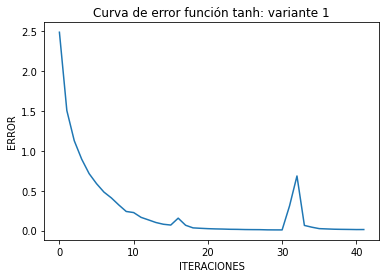

In [ ]:
plt.plot(clf.loss_curve_)
plt.title("Curva de error función tanh: variante 1")
plt.xlabel("ITERACIONES")
plt.ylabel("ERROR")

Text(0, 0.5, 'ERROR')

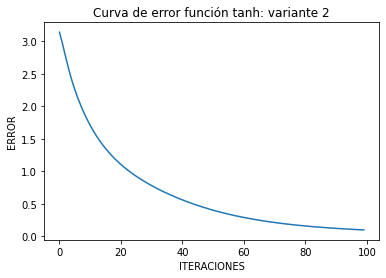

In [ ]:
plt.plot(clf1.loss_curve_)
plt.title("Curva de error función tanh: variante 2")
plt.xlabel("ITERACIONES")
plt.ylabel("ERROR")

Text(0, 0.5, 'ERROR')

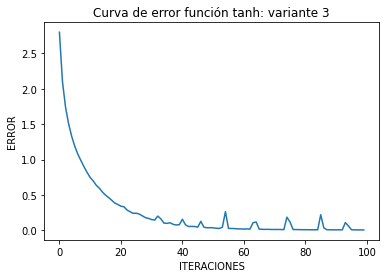

In [ ]:
plt.plot(clf2.loss_curve_)
plt.title("Curva de error función tanh: variante 3")
plt.xlabel("ITERACIONES")
plt.ylabel("ERROR")

Text(0, 0.5, 'ERROR')

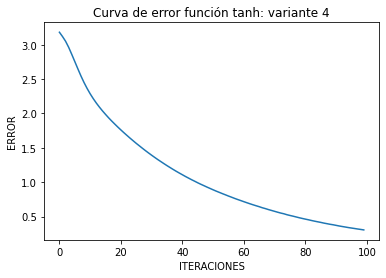

In [ ]:
plt.plot(clf3.loss_curve_)
plt.title("Curva de error función tanh: variante 4")
plt.xlabel("ITERACIONES")
plt.ylabel("ERROR")

## **Función de activación sigmoidea**

### Se definen los modelos

In [ ]:
#Tres capas internas de 50 neuronas cada una
#optimizador de la estocástica basada en gradientes propuesto por Kingma, Diederik y Jimmy Ba 
clf = MLPClassifier(
    hidden_layer_sizes=(50, 50, 50),
    solver="adam",
    max_iter=100,
    activation = 'logistic'
    #verbose=True
    )

#Tres capas internas de 50 neuronas cada una 
# Estocástica de gradiente descendiente
clf1 = MLPClassifier(
    hidden_layer_sizes=(50, 50, 50),
    solver="sgd",
    max_iter=100,
    activation = 'logistic'
    #verbose=True
    )

#Tres capas internas de 20 neuronas cada una
#optimizador de la estocástica basada en gradientes propuesto por Kingma, Diederik y Jimmy Ba 
clf2 = MLPClassifier(
    hidden_layer_sizes=(20, 20, 20),
    solver="adam",
    max_iter=100,
    activation = 'logistic'
    #verbose=True
    )

#Tres capas internas de 20 neuronas cada una 
# Estocástica de gradiente descendiente
clf3 = MLPClassifier(
    hidden_layer_sizes=(20, 20, 20),
    solver="sgd",
    max_iter=100,
    activation = 'logistic'
    #verbose=True
    )

### Se entrenan los modelos 

In [ ]:
clf.fit(x_train, y_train)
clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)
clf3.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='logistic', hidden_layer_sizes=(20, 20, 20),
              max_iter=100, solver='sgd')

### Se generan las predicciónes con los datos de testing

In [ ]:
y_pred = clf.predict(x_test)
y_pred1 = clf1.predict(x_test)
y_pred2 = clf2.predict(x_test)
y_pred3 = clf3.predict(x_test)

### Se imprimen la matrices de confusión y los reportes de accuracy

In [ ]:
print("Matriz de confusión y reporte función sigmoidea variante 1 \n")
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))
print("\nMatriz de confusión y reporte función sigmoidea variante 2 \n")
print(confusion_matrix(y_test,y_pred1))
print()
print(classification_report(y_test,y_pred1))
print("\nMatriz de confusión y reporte función sigmoidea variante 3 \n")
print(confusion_matrix(y_test,y_pred2))
print()
print(classification_report(y_test,y_pred2))
print("\nMatriz de confusión y reporte función sigmoidea variante 4 \n")
print(confusion_matrix(y_test,y_pred3))
print()
print(classification_report(y_test,y_pred3))

Matriz de confusión y reporte función sigmoidea variante 1 

[[308   0   0   0   0   0   0   0   0   0   0   0  23   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 363   0   7   0   0   0   0   0  41   0   0   0   0   0   0   0   0
    0  21   0   0   0   0]
 [  0   0 283   0   0   3   0   0   0   0   0   0   0  24   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 176   0   0   0   0   0   0   0   0  19   0   0   0   0   0
    0  19   0   0  31   0]
 [  7   0   0   0 350   0   0   0   0   0   0   1   0   0   0   0   0 140
    0   0   0   0   0   0]
 [  0   0   0   0   0 241   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   6]
 [  0   0   0   0   0   0 217  61   0   0   2   0  16   0   1  25   0   0
   26   0   0   0   0   0]
 [  0   0   0   0   0   0  20 247  15   0   0  18   0  22  19  54   0   0
   21   0   0   0  20   0]
 [ 38   0   0  39   0   0   0   0  82   0   0  41   0   0   0   3  21  32
    0   0   0   0   0  32]
 [  0   0   0   0   0   0   0 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

### Se imprimen los accuracy de los modelos

In [ ]:
print('\n Accuracy función sigmoidea variante 1: {}%'.format(round(accuracy_score(y_test, y_pred), 2)*100))
print('\n Accuracy función sigmoidea variante 2: {}%'.format(round(accuracy_score(y_test, y_pred1), 2)*100))
print('\n Accuracy función sigmoidea variante 3: {}%'.format(round(accuracy_score(y_test, y_pred2), 2)*100))
print('\n Accuracy función sigmoidea variante 4: {}%'.format(round(accuracy_score(y_test, y_pred3), 2)*100))


 Accuracy función sigmoidea variante 1: 62.0%

 Accuracy función sigmoidea variante 2: 2.0%

 Accuracy función sigmoidea variante 3: 55.00000000000001%

 Accuracy función sigmoidea variante 4: 2.0%


### Se plotean las curvas de error

Text(0, 0.5, 'ERROR')

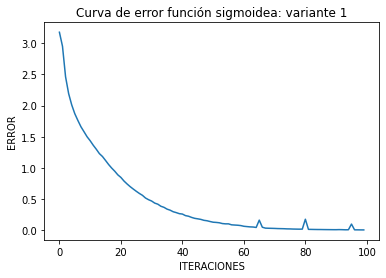

In [ ]:
plt.plot(clf.loss_curve_)
plt.title("Curva de error función sigmoidea: variante 1")
plt.xlabel("ITERACIONES")
plt.ylabel("ERROR")

Text(0, 0.5, 'ERROR')

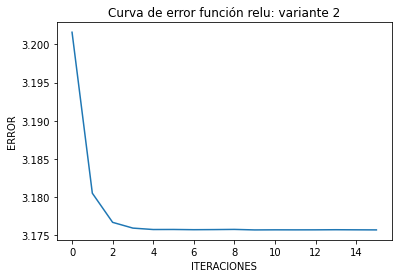

In [ ]:
plt.plot(clf1.loss_curve_)
plt.title("Curva de error función relu: variante 2")
plt.xlabel("ITERACIONES")
plt.ylabel("ERROR")

Text(0, 0.5, 'ERROR')

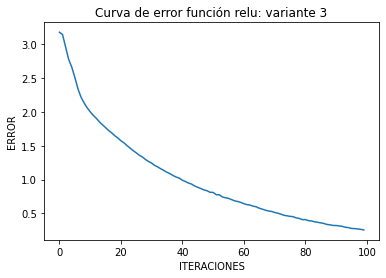

In [ ]:
plt.plot(clf2.loss_curve_)
plt.title("Curva de error función relu: variante 3")
plt.xlabel("ITERACIONES")
plt.ylabel("ERROR")

Text(0, 0.5, 'ERROR')

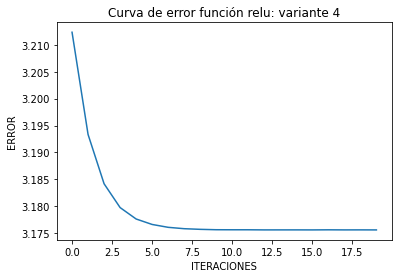

In [ ]:
plt.plot(clf3.loss_curve_)
plt.title("Curva de error función relu: variante 4")
plt.xlabel("ITERACIONES")
plt.ylabel("ERROR")